In [11]:
# Import libraries
from sklearn import tree
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline


In [3]:
# Load data
df = pd.read_csv("winequality-red.csv")

In [4]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
# mapping dictionary
quality_mapping = {3:0, 4:1, 5:2, 6:3, 7:4, 8:5}

In [7]:
# Perform Mapping
df.quality = df.quality.map(quality_mapping)

In [8]:
df.quality.value_counts()

quality
2    681
3    638
4    199
1     53
5     18
0     10
Name: count, dtype: int64

In [9]:
#Check shape before splitting
df.shape

(1599, 12)

In [10]:
# Split training and testing data
df_train = df.head(1000)
df_test = df.tail(599)

In [12]:
# Initialize lists to store accuracies for training and test data
train_accuracies = []
test_accuracies = []

In [13]:
# Iterate over afew depth values and append the accuracies respectively
for depth in range(1,25):
    # Initialize the model 
    clf = tree.DecisionTreeClassifier(max_depth=depth)
    
    # list of features for training
    cols = [
        'fixed acidity', 
        'volatile acidity',
        'citric acid', 
        'residual sugar',
        'chlorides',
        'free sulfur dioxide', 
        'total sulfur dioxide',
        'density',
        'pH', 
        'sulphates',
        'alcohol']
    
    # Train the model on given features
    clf.fit(df_train[cols], df_train.quality)

    # Create training and test predictions
    train_predictions = clf.predict(df_train[cols])
    test_predictions = clf.predict(df_test[cols])

    # Calculate training and test accuracies
    train_accuracy = metrics.accuracy_score(df_train.quality,train_predictions)
    test_accuracy = metrics.accuracy_score(df_test.quality, test_predictions)

    # Append Accuracies respectively
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

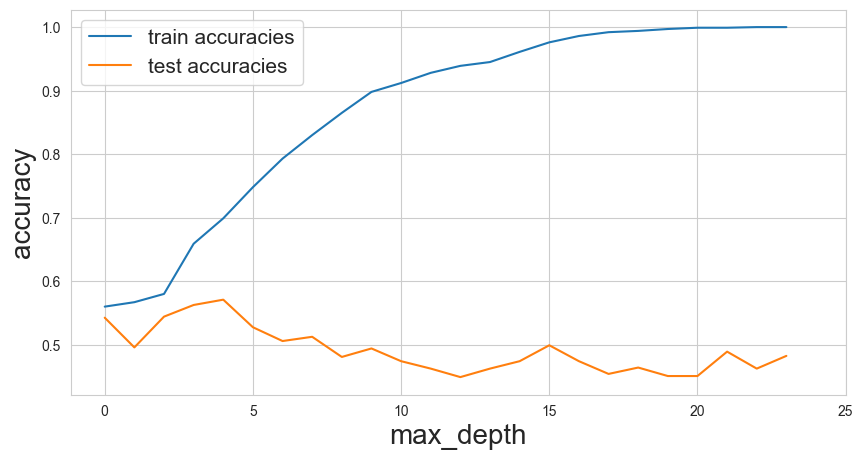

In [24]:
# Create 2 plots using matplotlib and seaborn
plt.figure(figsize=(10,5))
sns.set_style("whitegrid")
plt.plot(train_accuracies, label="train accuracies")
plt.plot(test_accuracies, label = "test accuracies")
plt.legend(loc="upper left", prop={'size': 15})
plt.xticks(range(0, 26, 5))
plt.xlabel("max_depth", size=20)
plt.ylabel("accuracy", size=20)
plt.show()

## Analysis

- We see that the best score for test data is obtained when max_depth has a value of 5. As we keep increasing the value of this parameter, test accuracy remains the same or gets worse, but the training accuracy keeps increasing. It means that our simple decision tree model keeps learning about the training data better and better with an increase in max_depth, but the performance on test data does not improve at all.
- This is called overfitting. 